In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import svm, tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import xgboost

In [72]:
df = pd.read_csv("../DataSet/Dataset.csv")

In [5]:
df.head(5)

,APP_ID,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,12345,0,YES,1,0,31,F,3,0,0,1,4,2,36,0,0.767104,12,0
1,12347,0,NO,1,1,40,F,2,1,1,0,1,1,12,2,0.619077,24,0
2,12349,0,YES,1,0,27,F,3,0,0,1,2,2,72,0,0.848949,36,0
3,12351,2,NO,1,1,33,M,2,0,1,0,2,1,120,1,0.515646,12,0
4,12353,2,NO,1,1,29,F,1,0,1,1,2,1,24,2,0.614123,24,1


In [6]:
#stripping the column names of white space
df.columns = df.columns.str.replace(' ','')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13299 entries, 0 to 13298
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   APP_ID             13299 non-null  int64  
 1   CIBIL_SCORE_VALUE  13299 non-null  int64  
 2   NEW_CUST           13299 non-null  object 
 3   CUS_CATGCODE       13299 non-null  int64  
 4   EMPLOYMENT_TYPE    13299 non-null  int64  
 5   AGE                13299 non-null  int64  
 6   SEX                13299 non-null  object 
 7   NO_OF_DEPENDENTS   13299 non-null  int64  
 8   MARITAL            13299 non-null  int64  
 9   EDU_QUA            13299 non-null  int64  
 10  P_RESTYPE          13299 non-null  int64  
 11  P_CATEGORY         13299 non-null  int64  
 12  EMPLOYEE_TYPE      13299 non-null  int64  
 13  MON_IN_OCC         13299 non-null  int64  
 14  INCOM_EXP_GMI      13299 non-null  int64  
 15  LTV                13299 non-null  float64
 16  TENURE             132

In [8]:
df.describe()

,APP_ID,CIBIL_SCORE_VALUE,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
count,13299.0000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000
mean,25643.0000,1.037898,0.908640,0.658922,32.473870,1.536281,0.590044,0.485149,0.427175,2.340778,0.833371,74.508760,0.751259,0.776054,24.792240,0.377171
std,7678.4699,0.865391,0.288132,0.474089,8.804317,0.971671,0.491844,0.499798,0.727715,1.341674,0.553415,72.971951,0.938441,0.126130,7.501085,0.484697
min,12345.0000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.007508,12.000000,0.000000
25%,18994.0000,0.000000,1.000000,0.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,24.000000,0.000000,0.719710,18.000000,0.000000
50%,25643.0000,1.000000,1.000000,1.000000,31.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,48.000000,0.000000,0.807537,24.000000,0.000000
75%,32292.0000,2.000000,1.000000,1.000000,38.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,100.000000,1.000000,0.849177,36.000000,1.000000
max,38941.0000,2.000000,1.000000,1.000000,55.000000,3.000000,1.000000,1.000000,2.000000,4.000000,2.000000,398.000000,3.000000,1.000000,36.000000,1.000000


In [9]:
df.corr()

,APP_ID,CIBIL_SCORE_VALUE,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
APP_ID,1.000000,0.009942,-0.011002,0.022982,0.000432,-0.018344,0.005520,0.034257,0.042191,0.032168,0.029499,0.015972,0.044291,-0.007395,-0.043714,-0.021743
CIBIL_SCORE_VALUE,0.009942,1.000000,-0.062113,-0.053539,0.176364,0.077063,0.136502,0.093796,-0.052456,-0.044414,-0.020729,0.141864,0.133280,0.011106,-0.027493,-0.035335
CUS_CATGCODE,-0.011002,-0.062113,1.000000,-0.046468,0.030525,0.006603,0.041869,-0.086445,0.046271,0.050780,0.004030,0.044972,-0.019529,-0.014645,0.000089,0.025449
EMPLOYMENT_TYPE,0.022982,-0.053539,-0.046468,1.000000,-0.189267,-0.078590,-0.141434,0.127783,0.091038,0.026573,0.335105,-0.265812,-0.159099,0.083429,0.036151,-0.032448
AGE,0.000432,0.176364,0.030525,-0.189267,1.000000,0.246085,0.491613,-0.068689,-0.129929,-0.032082,-0.057921,0.525443,0.103989,0.017558,-0.028053,0.016213
NO_OF_DEPENDENTS,-0.018344,0.077063,0.006603,-0.078590,0.246085,1.000000,0.236466,-0.080688,-0.128534,-0.116083,-0.024557,0.146210,0.015093,0.015606,-0.017191,-0.010696
MARITAL,0.005520,0.136502,0.041869,-0.141434,0.491613,0.236466,1.000000,-0.107670,-0.061148,0.009563,-0.058421,0.277898,0.049669,0.032459,-0.008575,0.008939
EDU_QUA,0.034257,0.093796,-0.086445,0.127783,-0.068689,-0.080688,-0.107670,1.000000,0.029952,-0.012302,0.063643,-0.084724,0.103713,-0.019962,0.003500,-0.031821
P_RESTYPE,0.042191,-0.052456,0.046271,0.091038,-0.129929,-0.128534,-0.061148,0.029952,1.000000,0.180616,0.008332,-0.110712,-0.021902,-0.017890,-0.007201,0.028630
P_CATEGORY,0.032168,-0.044414,0.050780,0.026573,-0.032082,-0.116083,0.009563,-0.012302,0.180616,1.000000,0.016424,-0.006349,0.008498,-0.045086,0.029213,0.001580


<AxesSubplot:xlabel='INCOM_EXP_GMI', ylabel='count'>

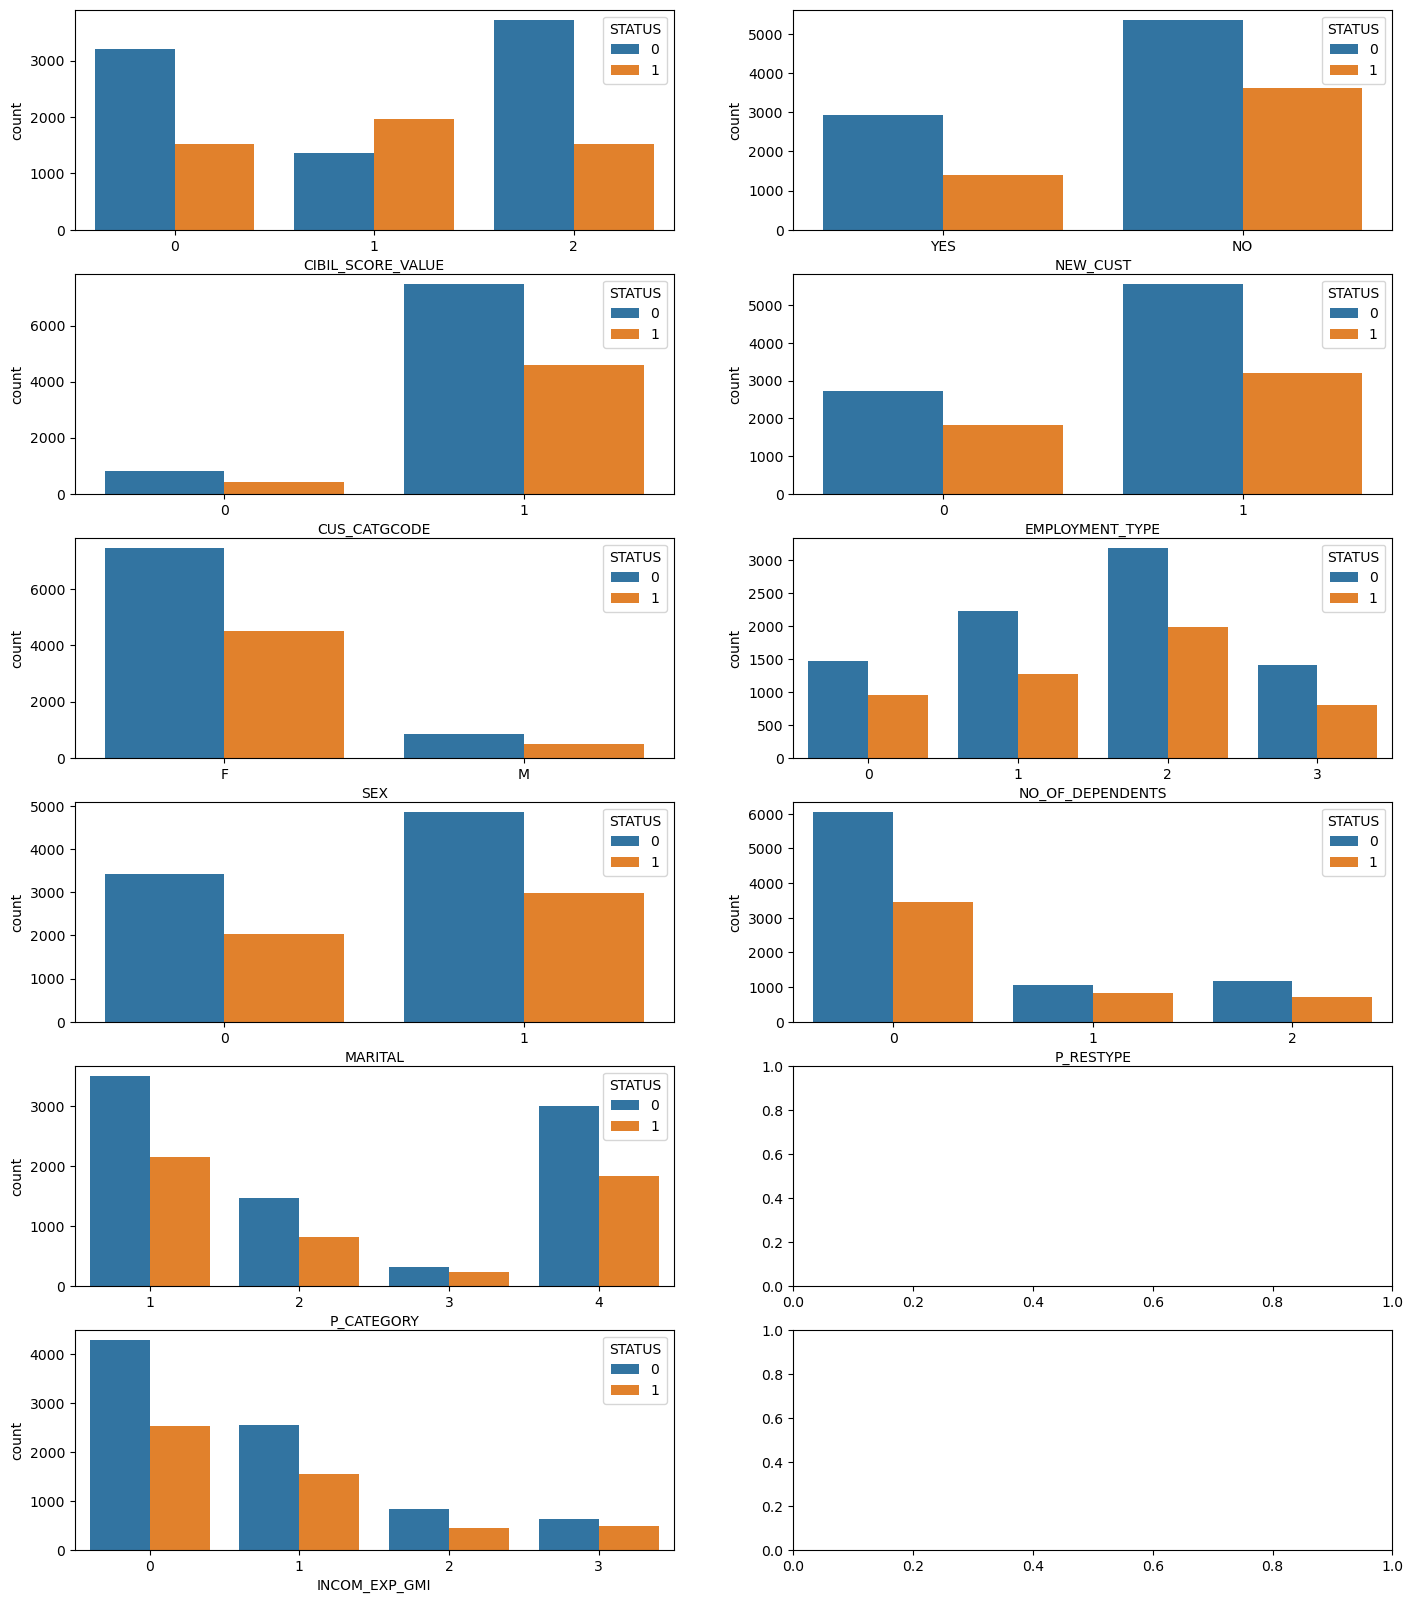

In [10]:
fig,axes = plt.subplots(6,2,figsize=(17,20))
sns.countplot(x='CIBIL_SCORE_VALUE',data=df,hue='STATUS',ax=axes[0,0])
sns.countplot(x='NEW_CUST',data=df,hue='STATUS',ax=axes[0,1])

sns.countplot(x='EMPLOYMENT_TYPE',data=df,hue='STATUS',ax=axes[1,1])
sns.countplot(x='CUS_CATGCODE',data=df,hue='STATUS',ax=axes[1,0])
sns.countplot(x='SEX',data=df,hue='STATUS',ax=axes[2,0])
sns.countplot(x='NO_OF_DEPENDENTS',data=df,hue='STATUS',ax=axes[2,1])
sns.countplot(x='MARITAL',data=df,hue='STATUS',ax=axes[3,0])
sns.countplot(x='P_RESTYPE',data=df,hue='STATUS',ax=axes[3,1])

sns.countplot(x='P_CATEGORY',data=df,hue='STATUS',ax=axes[4,0])
sns.countplot(x='INCOM_EXP_GMI',data=df,hue='STATUS',ax=axes[5,0])

DATA CLEANING

In [11]:
df.isna().sum()

APP_ID               0
CIBIL_SCORE_VALUE    0
NEW_CUST             0
CUS_CATGCODE         0
EMPLOYMENT_TYPE      0
AGE                  0
SEX                  0
NO_OF_DEPENDENTS     0
MARITAL              0
EDU_QUA              0
P_RESTYPE            0
P_CATEGORY           0
EMPLOYEE_TYPE        0
MON_IN_OCC           0
INCOM_EXP_GMI        0
LTV                  0
TENURE               0
STATUS               0
dtype: int64

In [12]:
#checking for unique entries in each columns
for col in df.columns:
        print('{} : {}'.format(col,df[col].unique()))

APP_ID : [12345 12347 12349 ... 38937 38939 38941]
CIBIL_SCORE_VALUE : [0 2 1]
NEW_CUST : ['YES' 'NO']
CUS_CATGCODE : [1 0]
EMPLOYMENT_TYPE : [0 1]
AGE : [31 40 27 33 29 26 38 25 21 42 34 28 24 53 30 35 50 32 44 36 20 54 22 55
 47 23 45 52 41 39 37 43 49 46 51 48 19 18]
SEX : ['F' 'M']
NO_OF_DEPENDENTS : [3 2 1 0]
MARITAL : [0 1]
EDU_QUA : [0 1]
P_RESTYPE : [1 0 2]
P_CATEGORY : [4 1 2 3]
EMPLOYEE_TYPE : [2 1 0]
MON_IN_OCC : [ 36  12  72 120  24  48 110  26 216  84  96  17   2 180  60 300 108  14
   6   8  98  16  28 168 288   5   4  18  30 240   7   3 144  13 122  65
  25 336 132  87  39 137 150  29 276  49  85 360  15   1 245 305  27 252
 156 204  50 228  97  61  37 241 121  71  31 192  41 104 324 182 242  78
  38 312  53  40  19  52 130 264 154  63 218   9  62  73  42 183  66 126
 102  67 170 158 217  75  54 361 134 188 117  74 338 269 362 106 303 277
  86 100 266 302 185 112 341 138 123  11 148 330 368  44  77 125  10  91
  35 344 152 348  20 101  22 310  69 246  58  93 339 145 157 


As we observe we dont have any missing values .Neither we can see any out of the box value in any of the variables

In [13]:
df.shape

(13299, 18)

# Converting categorical values to numerical value

In [14]:
#Counting number of rejected and accepted applicants
#Loan approved or rejected is 1 or 0 respectively
df['STATUS'].value_counts(normalize = True)

0    0.622829
1    0.377171
Name: STATUS, dtype: float64

Therefore as we can see ,5016 loans have been accepted out of 13299 loan requests
                       
                         8283 rejected out of 13299 loan requests

In [15]:
df['NEW_CUST'].replace(['NO','YES'],[0,1], inplace=True)
df['NEW_CUST'].value_counts(normalize = True)

0    0.673885
1    0.326115
Name: NEW_CUST, dtype: float64

In [16]:
df['EMPLOYEE_TYPE'].replace(['0','1','2'],[0,1,2], inplace=True)
df['EMPLOYEE_TYPE'].value_counts(normalize = True)

1    0.665990
0    0.250320
2    0.083691
Name: EMPLOYEE_TYPE, dtype: float64

In [17]:
df['MARITAL'].replace(['0','1'],[0,1], inplace=True)
df['MARITAL'].value_counts(normalize = True)

1    0.590044
0    0.409956
Name: MARITAL, dtype: float64

In [18]:
df['SEX'].replace(['F','M'],[1,0], inplace=True)
df['SEX'].value_counts(normalize = True)

1    0.900444
0    0.099556
Name: SEX, dtype: float64

In [19]:
#Loan tenure ranges from 12 to 48
df['TENURE'].value_counts(normalize = True)
#looking at distribution of Loan tenure available
df['TENURE'].value_counts(normalize = True).to_frame('Total applicants').rename_axis('Months')

,Total applicants
Months,
24,0.448380
36,0.256636
18,0.208737
12,0.086247


44.8% of the total applicants prefer 24 month loan tenure

Let see how different variable effect the target variable

In [20]:
#Lets rename status column to 'target'
df.rename(columns = {'STATUS':'Target'}, inplace = True)
df.head(2)

,APP_ID,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,Target
0,12345,0,1,1,0,31,1,3,0,0,1,4,2,36,0,0.767104,12,0
1,12347,0,0,1,1,40,1,2,1,1,0,1,1,12,2,0.619077,24,0


Loan Approval Prediction Machine Learning


selecting appropriate Machine Learning Model:

In [21]:
x = df.drop(['APP_ID','Target'], axis=1)
y = df["Target"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.15,shuffle = True,random_state=1, stratify = y)

We will fit our algorithms in our classifiers array on Train dataset and check the accuracy and confusion matrix for our test dataset prediction given by different algorithms

# XGBOOST

In [22]:
import xgboost as xgb

XGBoost provides a way to convert our training and testing data into DMatrix. DMatrix is an optimized data structure that provides better memory efficiency and training speed. The best part is that converting a dataset into DMatrix is really easy

In [23]:
# convert to DMatrix
d_train = xgb.DMatrix(xtrain, ytrain)
d_test = xgb.DMatrix(xtest, ytest)

In [24]:
#Setting up Parameters in XGBoost
params_1 = {
    'booster': 'gbtree',
    'max_depth': 5, 
    'learning_rate': 0.1,
    'sample_type': 'uniform',
    'normalize_type': 'tree',
    'objective': 'binary:hinge',
    'rate_drop': 0.1,
    'n_estimators': 500
}
#To train on the dataset using a DMatrix, we need to use the XGBoost train() method.
#The train() method takes two required arguments, the parameters, and the DMatrix. 
#Following is the code for training using DMatrix.
xgb_clf = xgb.train(params_1, d_train)

[01:48:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators", "normalize_type", "rate_drop", "sample_type" } are not used.



Using the above model, we can also predict the survival classes on our validation set. We will get the classification results as either 0 or 1. After that, we will calculate the accuracy of our model.

In [25]:
# make prediction
preds = xgb_clf.predict(d_test)

# print accuracy score
print(np.round(accuracy_score(ytest, preds)*100, 2), '%')

39.65 %


# SVM

In [26]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [27]:
# Feature Scaling
sc = StandardScaler()
sc.fit(xtrain)
X_train_std = sc.transform(xtrain)
X_test_std = sc.transform(xtest)
 
# Training a SVM classifier using SVC class
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train_std, ytrain)
 
# Model performance
 
ypred = svm.predict(X_test_std)
print('Accuracy: %.3f' % (accuracy_score(ytest, ypred)*100))

Accuracy: 64.812


# DecisionTreeClassifier()


In [28]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [29]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [30]:
# Function to perform training with entropy.
def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix:\n ",confusion_matrix(y_test, y_pred))      
    print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)      
    print("Report : ",classification_report(y_test, y_pred))
  


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

tree_clf = DecisionTreeClassifier()
tree_clf.fit(xtrain,ytrain)
ypred = tree_clf.predict(xtrain)
print("Training Data Set Accuracy: ", accuracy_score(ytrain,ypred))
print("Training Data F1 Score ", f1_score(ytrain,ypred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,xtrain,ytrain,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,xtrain,ytrain,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  0.9904458598726115
Training Data F1 Score  0.9871794871794872
Validation Mean F1 Score:  0.5488660633678376
Validation Mean Accuracy:  0.5675865483594462


Overfitting Problem
We can see from above metrics that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. Hence, model is overfit. We will try some Hyper-parameter tuning and see if it helps.

First let's try tuning 'Max_Depth' of tree

In [32]:
# Driver code
def main():
    # Building Phase
    clf_gini = train_using_gini(xtrain,xtest,ytrain)
    clf_entropy = train_using_entropy(xtrain,xtest,ytrain)
    
    # Operational Phase 
    print("Results Using Gini Index:")
    # Prediction using gini
    y_pred_gini = prediction(xtest, clf_gini)
    cal_accuracy(ytest, y_pred_gini)
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(xtest, clf_entropy)
    cal_accuracy(ytest, y_pred_entropy)
    
# Calling main function
if __name__=="__main__":
    main()

Results Using Gini Index:
Predicted values:
[0 1 0 ... 0 1 0]
Confusion Matrix:
  [[1010  233]
 [ 431  321]]
Accuracy :  66.71679197994987
Report :                precision    recall  f1-score   support

           0       0.70      0.81      0.75      1243
           1       0.58      0.43      0.49       752

    accuracy                           0.67      1995
   macro avg       0.64      0.62      0.62      1995
weighted avg       0.66      0.67      0.65      1995

Results Using Entropy:
Predicted values:
[0 1 0 ... 0 1 0]
Confusion Matrix:
  [[1010  233]
 [ 431  321]]
Accuracy :  66.71679197994987
Report :                precision    recall  f1-score   support

           0       0.70      0.81      0.75      1243
           1       0.58      0.43      0.49       752

    accuracy                           0.67      1995
   macro avg       0.64      0.62      0.62      1995
weighted avg       0.66      0.67      0.65      1995



# RANDOMFORESTCLASSIFIER


In [33]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(xtrain,ytrain)
  
# performing predictions on the test dataset
y_pred = clf.predict(xtest)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", (metrics.accuracy_score(ytest, y_pred)*100))


ACCURACY OF THE MODEL:  64.76190476190476


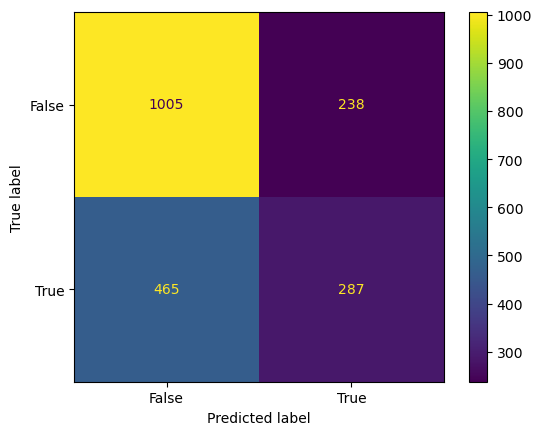

In [34]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ytest, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

# LOGISTIC REGRESSION

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Now, it is very important to perform feature scaling here because Age and Estimated Salary values lie in different ranges. If we don’t scale the features then the Estimated Salary feature will dominate the Age feature when the model finds the nearest neighbor to a data point in the data space.

In [37]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

After training the model, it is time to use it to do predictions on testing data. 

In [39]:
y_pred = classifier.predict(xtest)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1074  169]
 [ 566  186]]


In [41]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", (accuracy_score(ytest, y_pred))*100)

Accuracy :  63.1578947368421


# KNN neigbour classifier


In [42]:
# Import necessary modules
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

KNN Classifier Implementation
After that, we’ll build a kNN classifier object. I develop two classifiers with k values of 1 and 5 to demonstrate the relevance of the k value. The models are then trained using a train set. The k value is chosen using the n_neighbors argument. It does not need to be explicitly specified because the default value is 5

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

Next, train the model with the help of KNeighborsClassifier class of sklearn as follows −

In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=8)

At last we need to make prediction. It can be done with the help of following script −

In [45]:
y_pred = classifier.predict(xtest)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:")
print(result)

result1 = classification_report(ytest, y_pred)
print("Classification Report:",)
print (result1)

result2 = accuracy_score(ytest,y_pred)
print("Accuracy:",result2*100)

Confusion Matrix:
[[1062  181]
 [ 589  163]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.85      0.73      1243
           1       0.47      0.22      0.30       752

    accuracy                           0.61      1995
   macro avg       0.56      0.54      0.52      1995
weighted avg       0.58      0.61      0.57      1995

Accuracy: 61.40350877192983


# Gradient boost classifier


In [47]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators = 100)
gb

GradientBoostingClassifier()

In [48]:
gb = gb.fit(xtrain,ytrain)

In [49]:
print("Training set score: {:.3f}".format(gb.score(xtrain,ytrain)))
print("Test set score: {:.3f}".format(gb.score(xtest,ytest)))

Training set score: 0.683
Test set score: 0.666


In [50]:
pred_gb = gb.predict(xtest)

In [51]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(ytest,pred_gb)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1042  201]
 [ 465  287]]


In [52]:
from sklearn.metrics import accuracy_score
y_pred = gb.predict(xtest)
print("GBC accuracy is %2.2f" % ((accuracy_score(ytest,y_pred))*100))

GBC accuracy is 66.62


# Naive Bayes Classifier 

In [53]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(xtrain,ytrain)

GaussianNB()

In [54]:
#Predict reults
ypred = gnb.predict(xtest)

In [55]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format((accuracy_score(ytest,ypred)*100)))

Model accuracy score: 62.6065


In [56]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1118  125]
 [ 621  131]]


# ACCURACY

We have used multiple algorithms for training purposes like Decision Tree, Random Forest, SVC, Logistic Regression, XGB Regressor, etc.


Accuracy of all 6 models are fo the current time is ,

1) XGboost : Accuracy = 44.91 % 

2)
Decisiontreeclassifier using gini : Accuracy = 66.56641604010025 %

Decisiontreeclassifier using entropy : Accuracy = 66.9172932330827 %

3) logistic regression : Accuracy = 65.26315789473685%

4) random forest classifier(RFC): Accuracy = 65.1629072681704 %

5) SVM: Accuracy = 64.8 %

6) KNN Classifier: Accuracy = 60.70175438596491 %

7) Gradient boostingclassifier(GBC) :Accuracy = 69 %

8) Naive Bayes Classifier :Accuracy = 63.16 %


DecisionTreeClassifier using entropy performs best on the validation data with an accuracy score of 66.9%

As we can see the model with highest accuracy are GBC,Decision tree using entropy,gini,logistic regression and so on.

Now we have to classify whether our loan will be approved or rejected therefore we have to ot for model with HIGH PRECISION i.e., MINIMIZE FALSE POSITIVE.
Now if we observe the false positive value from respective confusion matrix,

We RANK model to according to their accuracy

1) Gradient boostingclassifier(GBC) = 195
2)
Decisiontreeclassifier using entropy = 232
Decisiontreeclassifier using gini = 245

3) logistic regression = 141

As we can observe ,Gradient boostingclassifier(GBC) not only has high precision also  has low false postive with respect to first 3 models.



Now creating an prediction model for loan aprroval/rejection 
Gradient boostingclassifier(GBC) 

# Hyperparameter tuning of Gradient boosting algorithm using Python

Finding The optimum number of trees in Gradient boosting

Finding the optimum depth of trees in the Gradient boosting algorithm using Python

Finding an optimum Learning rate in Gradient boosting algorithm using Python

Finding an optimum number of features in the Gradient boosting algorithm using Python

Finding the optimum number of samples in the Gradient boosting algorithm using Python

GridSearchCV for Gradient boosting algorithm using Python

As we know there are various important parameters in the Gradient boosting algorithm that helps to get an optimum result. In this section, we will go through some of these parameters and will use a couple of methods to find the optimum values for these parameters.

# Finding The optimum number of trees in Gradient boosting

In [57]:
# importing all modules for Gradient boosting algorithm using Python
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from numpy import arange
from sklearn.model_selection import GridSearchCV

The next step: Initialize the model with multiple iterations.
Here iterations simply mean the number of trees or weak learners.
Because in each iteration, the model creates a weak learner. We will create a user-defined function that will return multiple models with different numbers of iterations.

In [58]:
# fuction to create models
def build_models():
    
#dic of models
    GB_models = dict()
    
    # number of decision stumps
    decision_stump= [10, 50, 100, 500, 1000]
        
#    using for loop to iterate though trees
    for i in decision_stump:
        
#         building model with specified trees
        GB_models[str(i)] = GradientBoostingClassifier(n_estimators=i)
    
#     returning the model
    return GB_models

As you can see, the above model returns a dictionary of models with different iteration values starting from 10 to 1000.

Next, we will create a function for the evaluation of the models that we have created above. We will use the same function for the evaluation of models while finding other parameters as well.

In [59]:
# function for the validation of model
def evaluate_model(model, Input, Ouput):
    
    # defining the method of validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
    
    
    # validating the model based on the accurasy score
    accuracy = cross_val_score(model, Input, Ouput, scoring='accuracy', cv=cv, n_jobs=-1)
    
#     returning the accuracy score
    return accuracy

As you can see, the above function evaluates the model based on the accuracy core and it uses the cross-validation method.

Now, it is time to call these functions and print out the optimum number of iterations.

In [60]:
# calling the build_models function
models = build_models()
# creating list
results, names = list(), list()
# using for loop to iterate thoug the models
for name, model in models.items():
    
    # calling the validation function
    scores = evaluate_model(model,x,y)
    
    
    # appending the accuray socres in results
    results.append(scores)
    names.append(name)
    
    
    # printing - Gradient boosting algorithm using Python
    print('---->Iterations (%s)---Accuracy( %.5f)' % (name, mean(scores)))

---->Iterations (10)---Accuracy( 0.66293)
---->Iterations (50)---Accuracy( 0.66880)
---->Iterations (100)---Accuracy( 0.66945)
---->Iterations (500)---Accuracy( 0.66080)
---->Iterations (1000)---Accuracy( 0.65241)


As you can see, the accuracy increases to 100 iterations and then again starts to decrease. So, we can say that the optimum number of iterations of the Gradient boosting model on our dataset is 100

# Finding the optimum depth of trees in the Gradient boosting algorithm using Python

As we know that the Gradient boosting algorithm uses decision trees as weak learners and it is important to find the optimum depth of these weak learners. Let us create a function with various depth values of trees.

In [61]:
# building function for the model
def build_models():
    
#     creating dic of models
    GB_models = dict()
    
#     specifying the depth of trees
    for i in range(1,12):
        
#         appending the models
        GB_models[str(i)] = GradientBoostingClassifier(max_depth=i)
        
#   returining the model
    return GB_models

We will use the evaluation function that we have created in the above section. So let us now call the building model and evaluation functions to get the optimum depth of decision trees.


In [62]:
# calling the function
models = build_models()
# creating lists 
results, names = list(), list()
# iterating through the models
for name, model in models.items():
    
    # calling the evalution function
    accuracy = evaluate_model(model,x,y)
    
    # appending the results
    results.append(accuracy)
    names.append(name)
    
#     printing - Gradient boosting algorithm using Python
    print('---->Decision tree depth (%s)---Accuracy( %.5f)' % (name, mean(accuracy)))

---->Decision tree depth (1)---Accuracy( 0.66777)
---->Decision tree depth (2)---Accuracy( 0.66847)
---->Decision tree depth (3)---Accuracy( 0.66880)
---->Decision tree depth (4)---Accuracy( 0.66556)
---->Decision tree depth (5)---Accuracy( 0.66373)
---->Decision tree depth (6)---Accuracy( 0.65950)
---->Decision tree depth (7)---Accuracy( 0.65306)
---->Decision tree depth (8)---Accuracy( 0.64952)
---->Decision tree depth (9)---Accuracy( 0.64363)
---->Decision tree depth (10)---Accuracy( 0.64188)
---->Decision tree depth (11)---Accuracy( 0.63694)


As you can see, we get an optimum accuracy score when the depth of decision trees was 4.

# Finding an optimum Learning rate in Gradient boosting algorithm using Python

The learning rate determines the step sizes in each of the iterations. It is also one of the important parameters that have a high impact on the results of the model. Let us now create a function that will build multiple models with different learning rates

In [63]:
# creating function
def build_models():
    
#     creating dic of models
    GB_models = dict()
    
#     different learning rates
    for i in [0.0001, 0.001, 0.01, 0.1, 1.0]:
        
#         key value
        k = '%.4f' % i
    
#     appending the models
        GB_models[k] = GradientBoostingClassifier(learning_rate=i)
    return GB_models

Now, we will call this function to create multiple models, and then we will call the evaluation function to evaluate the performance of each of the models with different learning rates.

In [64]:
# calling the function
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    accuracy = evaluate_model(model,x,y)
    
#     storing the accurcy
    results.append(accuracy)
    names.append(name)
    
#     printing learning rate of Gradient boosting algorithm using Python
    print('---->Learning Rate(%s)---Accuracy( %.5f)' % (name, mean(accuracy)))

---->Learning Rate(0.0001)---Accuracy( 0.62283)
---->Learning Rate(0.0010)---Accuracy( 0.62283)
---->Learning Rate(0.0100)---Accuracy( 0.66381)
---->Learning Rate(0.1000)---Accuracy( 0.66877)
---->Learning Rate(1.0000)---Accuracy( 0.63080)


As you can see, we get the highest accuracy score when the learning rate was 0.1. Let us also plot the mean accuracy on the box plot as well.

# Finding an optimum number of features in the Gradient boosting algorithm using Python

Each decision tree can have a different amount of attributes that are utilized to suit it.
Similar to modifying the sample size, changing the number of features gives more variance to the model, which may enhance performance. Let us create a function that will return multiple models with a different number of input features. In our case, we can use at most 4 features as our dataset has 4 input features ( you can adjust the range depending on your dataset).

In [65]:
# creating the function 
def build_models():
    
#     creating dic of models
    GB_models = dict()
    
    # explore features numbers from 1-4
    for i in range(1,5):
        
#         appending the models
        GB_models[str(i)] = GradientBoostingClassifier(max_features=i)
    
#     returining the models
    return GB_models

Now, we will call this function and the evaluation function to get the optimum number of features.

In [66]:
# calling the function
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    accuracy = evaluate_model(model,x,y)
    
#     storing the accurcy
    results.append(accuracy)
    names.append(name)
    
#     printing features of Gradient boosting algorithm using Python
    print('---->Features(%s)---Accuracy( %.5f)' % (name, mean(accuracy)))

---->Features(1)---Accuracy( 0.65306)
---->Features(2)---Accuracy( 0.66744)
---->Features(3)---Accuracy( 0.66915)
---->Features(4)---Accuracy( 0.67013)


As you can see, the optimum number of features is 3, as we get high accuracy score for it

# Finding the optimum number of samples in the Gradient boosting algorithm using Python

You can change how many samples were used to fit each tree. This indicates that a randomly chosen portion of the training dataset is used to fit each tree. Using fewer samples introduces more variance for each tree, although it can improve the overall performance of the model. Let us now create a function that returns multiple models with different sample values.

In [67]:
# creating the function
def build_models():
    
#     dic of models
    GB_models = dict()
    
#     exploring different sample values
    for i in arange(0.1, 1.1, 0.1):
        
#         key value
        k = '%.1f' % i
    
#     appending the model
        GB_models[k] = GradientBoostingClassifier(subsample=i)
    return GB_models

Let us now call the above function and the evaluation function.

In [68]:
# calling the function
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    accuracy = evaluate_model(model,x,y)
    
#     storing the accurcy
    results.append(accuracy)
    names.append(name)
    
#     printing sampes for Gradient boosting algorithm using Python
    print('---->Samples(%s)---Accuracy( %.5f)' % (name, mean(accuracy)))

---->Samples(0.1)---Accuracy( 0.66040)
---->Samples(0.2)---Accuracy( 0.66454)
---->Samples(0.3)---Accuracy( 0.66887)
---->Samples(0.4)---Accuracy( 0.66757)
---->Samples(0.5)---Accuracy( 0.66887)
---->Samples(0.6)---Accuracy( 0.66882)
---->Samples(0.7)---Accuracy( 0.66857)
---->Samples(0.8)---Accuracy( 0.66927)
---->Samples(0.9)---Accuracy( 0.66900)
---->Samples(1.0)---Accuracy( 0.66945)


As you can see, we get different accuracy scores for each of the sample sizes but the optimum score is when the sample size is 0.9. 

# Now creating an prediction model ,the Gradient boosting classifier using these best parameters for aprroval/rejection of loan

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators = 50, subsample=1.0,max_depth=2,max_features=4)
gb

GradientBoostingClassifier(max_depth=2, max_features=4, n_estimators=50)

In [73]:
gb = gb.fit(xtrain,ytrain)

In [74]:
print("Training set score: {:.3f}".format(gb.score(xtrain,ytrain)))
print("Test set score: {:.3f}".format(gb.score(xtest,ytest)))

Training set score: 0.666
Test set score: 0.649


In [75]:
pred_gb = gb.predict(xtest)

In [76]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(ytest,pred_gb)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1056  187]
 [ 513  239]]


In [77]:
from sklearn.metrics import accuracy_score
y_pred = gb.predict(xtest)
print("GBC accuracy is %2.2f" % ((accuracy_score(ytest,y_pred))*100))

GBC accuracy is 64.91
